<a href="https://colab.research.google.com/github/vaasanthk/Machine-Learning/blob/master/advance_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"vaasanthk","key":"b488562aeb287aa003e0c37cbc11ea8f"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download --force home-data-for-ml-course

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 28.1MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 62.2MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 63.5MB/s]


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [0]:
data_train = pd.read_csv('/content/train.csv')

In [0]:
print(data_train.shape)
data_train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
data_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

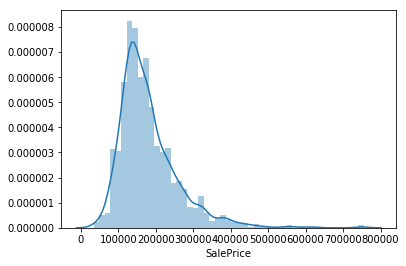

In [0]:
sns.distplot(data_train.SalePrice);

In [0]:
# skewness and kurtosis
print(f'Skewness: {data_train.SalePrice.skew()}')
print(f'Kurtosis: {data_train.SalePrice.kurtosis()}')

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


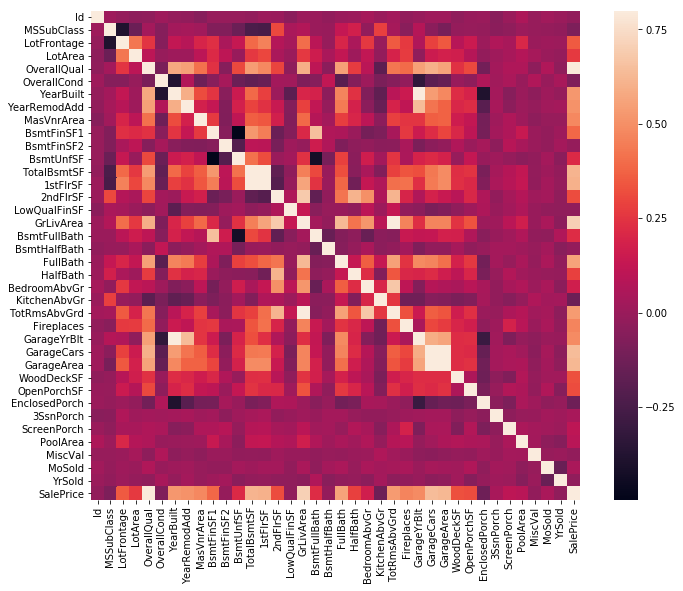

In [0]:
# correlation matrix
corr = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax = .8, square=True);
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True);


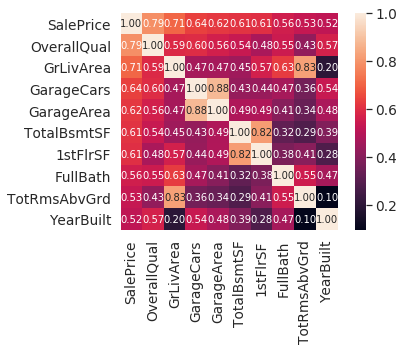

In [0]:

#saleprice correlation matrix
cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True,    
                  square = True, fmt = '.2f', annot_kws = {'size': 10},
                   yticklabels = cols.values, xticklabels =cols.values)


plt.show()

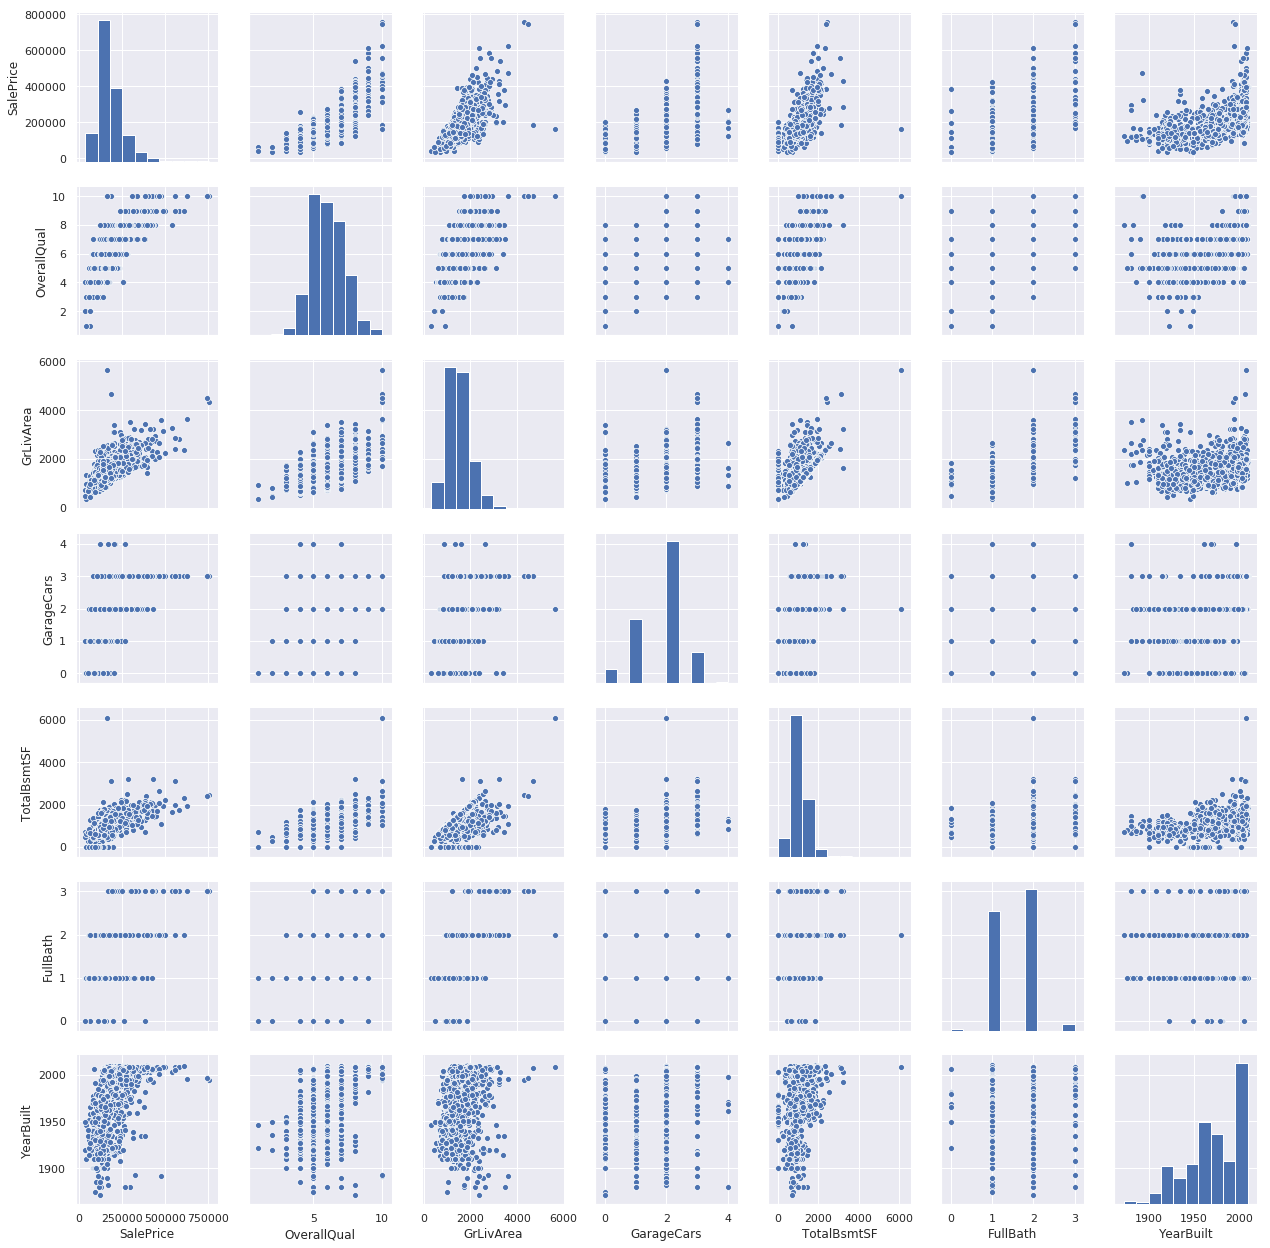

In [0]:
# scatter plot 
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_train[cols], size = 2.5)
plt.show()

In [0]:
#missing data
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis= 1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [0]:
#dealing with the missing data
data_train = data_train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
data_train = data_train.drop(data_train.loc[data_train['Electrical'].isnull()].index)

data_train.isnull().sum().max()

0

In [0]:
saleprice_scaled = StandardScaler().fit_transform(data_train['SalePrice']
                                                  [:, np.newaxis])

low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]
print(f'outer range (low) of the distributrion: \n{low_range}\n\n'
      f'outer range (low) of the distributrion: \n{high_range}')

outer range (low) of the distributrion: 
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (low) of the distributrion: 
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


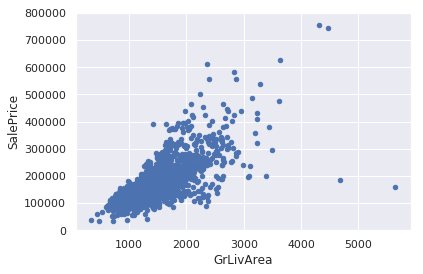

In [0]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis = 1)
data.plot.scatter(x=var, y = 'SalePrice', ylim = (0, 800000) );


In [0]:
data_train.sort_values(by = 'GrLivArea', ascending= False)[:2]
data_train = data_train.drop(data_train[data_train['Id'] == 1299].index)
data_train = data_train.drop(data_train[data_train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


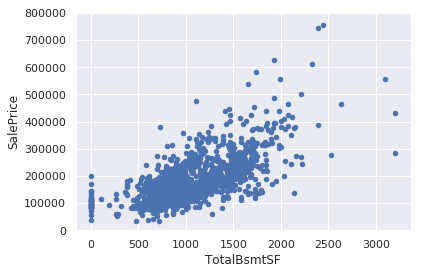

In [0]:
#bivaritate analysis saleprice/totalbsntsf
data = pd.concat([data_train['SalePrice'], data_train['TotalBsmtSF']], 
                axis = 1)
data.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice', ylim = (0, 800000))

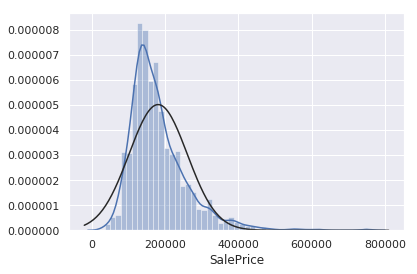

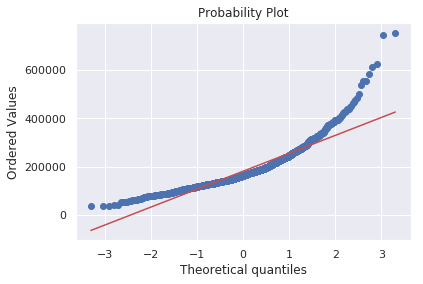

In [0]:
sns.distplot(data_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot =plt)

In [0]:
#applying log transformation 
data_train['SalePrice'] = np.log(data_train['SalePrice'])



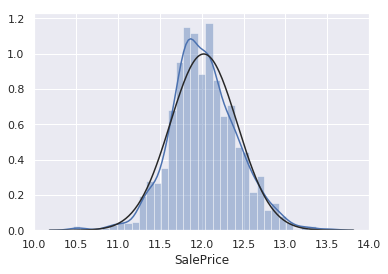

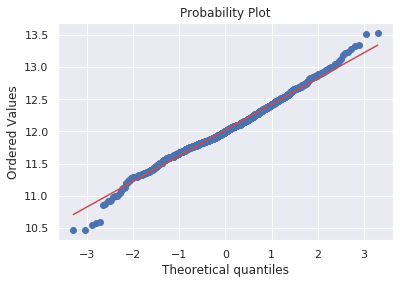

In [0]:
#transformed histogram and normal probability plot
sns.distplot(data_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot = plt)

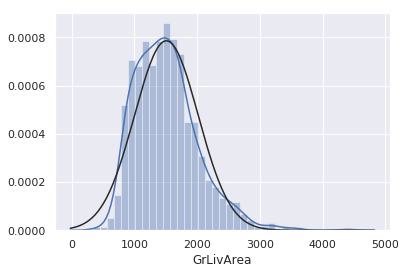

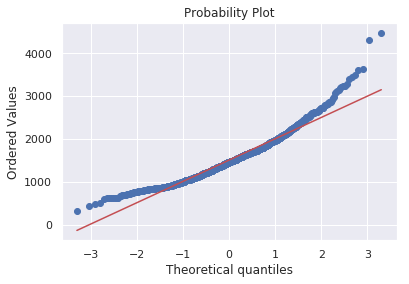

In [0]:

sns.distplot(data_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_train['GrLivArea'], plot = plt)

In [0]:
data_train['GrLivArea'] = np.log(data_train['GrLivArea'])

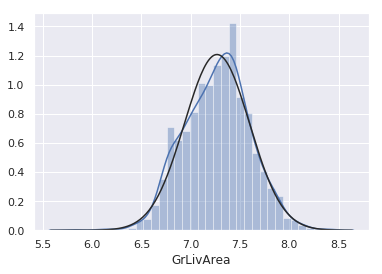

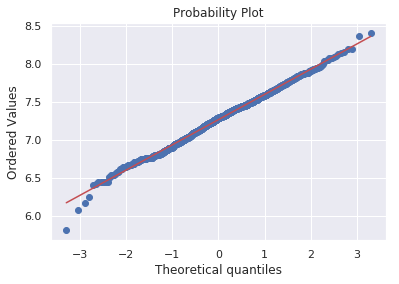

In [0]:
sns.distplot(data_train['GrLivArea'], fit = norm)
plt.figure()
res = stats.probplot(data_train['GrLivArea'], plot = plt)

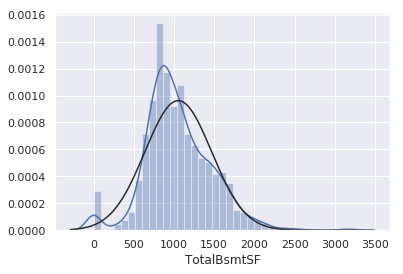

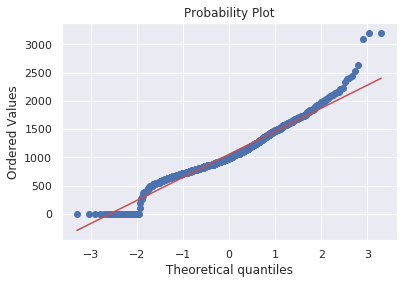

In [0]:
sns.distplot(data_train['TotalBsmtSF'], fit = norm)
plt.figure()
res = stats.probplot(data_train['TotalBsmtSF'], plot = plt)

In [0]:
data_train['HasBsmt'] = pd.Series(len(data_train['TotalBsmtSF']), index=data_train.index)
data_train['HasBsmt'] = 0 
data_train.loc[data_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [0]:
#transform the data
data_train.loc[data_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(data_train['TotalBsmtSF'])

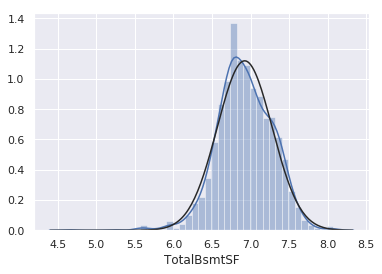

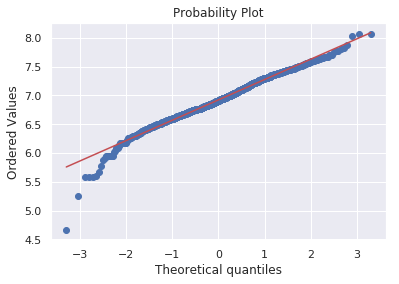

In [0]:
#hitogram and normal probablity plot
sns.distplot(data_train[data_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_train[data_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

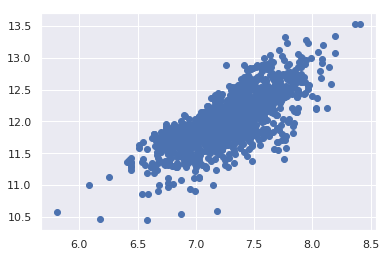

In [0]:
plt.scatter(data_train['GrLivArea'], data_train['SalePrice'])

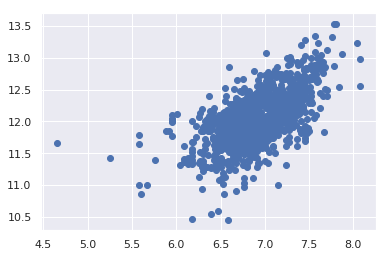

In [0]:
plt.scatter(data_train[data_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], data_train[data_train['TotalBsmtSF'] > 0]['SalePrice'])